# 图像识别

>注意：cv2中的色彩排列是(b,g,r)，而matplotlib库中的排列方式是(r,g,b)，本文件中采用plt进行输出，因此颜色不是准确的颜色

### 1. OpenCV，机器视觉

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('../data/forest.jpg')
print(original.shape, original.dtype)
cv.imshow('Original', original)  # 显示图片（是非阻塞函数）
# cv.waitKey()  # 等待按键响应
plt.imshow(original)

(397, 600, 3) uint8


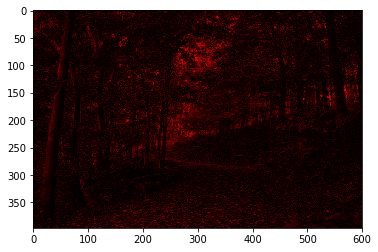

In [2]:
red = np.zeros_like(original)
red[..., 0] = original[..., 0]  # 0表示红色通道
cv.imshow('Red', red)
plt.imshow(red)

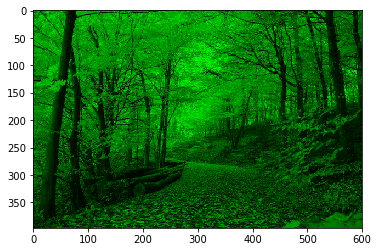

In [3]:
green = np.zeros_like(original)
green[..., 1] = original[..., 1]  # 1表示绿色通道
cv.imshow('Green', green)
plt.imshow(green)

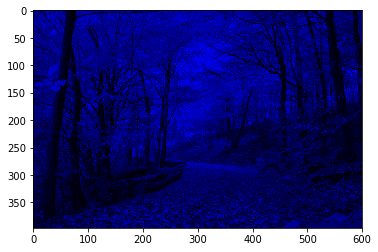

In [4]:
blue = np.zeros_like(original)
blue[..., 2] = original[..., 2]  # 2表示蓝色通道
cv.imshow('Blue', blue)
plt.imshow(blue)

#### 裁剪图片

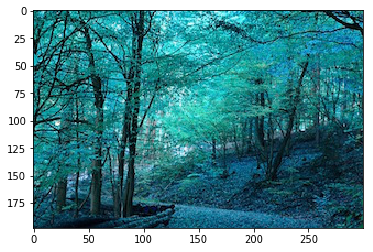

In [5]:
h, w = original.shape[:2]
l, t = int(w / 4), int(h / 4)
r, b = int(w * 3 / 4), int(h * 3 / 4)
cropped = original[t:b, l:r]
cv.imshow('Cropped', cropped)
plt.imshow(cropped)

#### 缩小图片

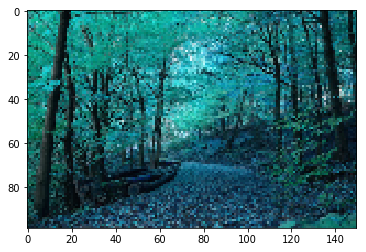

In [6]:
scaled1 = cv.resize(original, (int(w / 4), int(h / 4)))
plt.imshow(scaled1)

#### 颜色差值

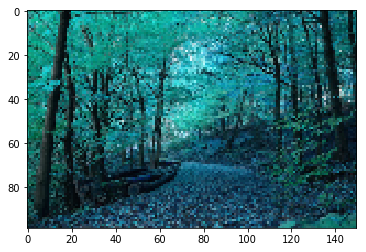

In [7]:
scaled2 = cv.resize(original, (int(w / 4), int(h / 4)), interpolation=cv.INTER_LINEAR)
plt.imshow(scaled2)

#### 放大

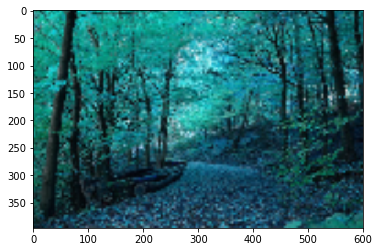

In [8]:
scaled3 = cv.resize(scaled2, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)
plt.imshow(scaled3)

#### 保存图片

In [9]:
cv.imwrite('../data/save.jpg', red)

True

### 2. 边缘检测

- 亮度梯度
    - 假设一张画放在xy轴的坐标系上，z轴代大小表每个像素，形成了一个三维函数，这样可以找到**亮度梯度变化最大的位置**，即为某物体的边缘
    
- 可以用之前的聚类方法作为预处理，然后再边缘检测

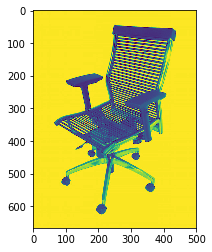

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt


original = cv.imread('../data/chair.jpg', cv.IMREAD_GRAYSCALE)  # 灰度读取
plt.imshow(original)

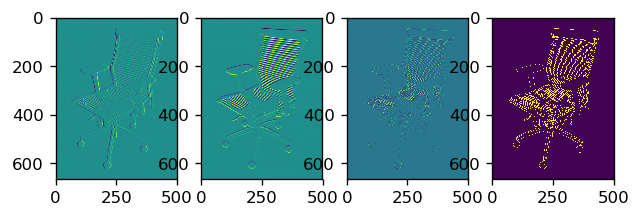

In [18]:
# 索贝尔卷积
# 水平
hsobel = cv.Sobel(original, cv.CV_64F, 1, 0, ksize=5) # 1, 0为水平垂直方向开关， 卷积核为5
# CV_64FC1   64F代表每一个像素点元素占64位浮点数，通道数为1
# CV_64FC3   64F代表每一个像素点元素占64点×3个浮点数，通道数为4
# 垂直
vsobel = cv.Sobel(original, cv.CV_64F, 0, 1, ksize=5)
plt.figure(dpi=120)
plt.subplot(1, 4, 1)
plt.imshow(hsobel)
plt.subplot(1, 4, 2)
plt.imshow(vsobel)

# 拉不拉丝
laplacian = cv.Laplacian(original, cv.CV_64F)
plt.subplot(1, 4, 3)
plt.imshow(laplacian)

canny = cv.Canny(original, 50, 240)  # 水平垂直为阈值
plt.subplot(1, 4, 4)
plt.imshow(canny)

### 3. 亮度提升

直方图均衡化

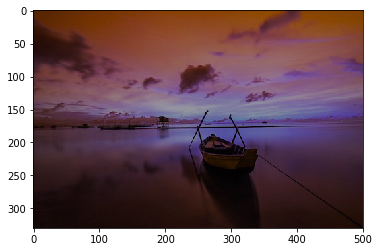

In [19]:
import cv2 as cv
import matplotlib.pyplot as plt


original = cv.imread('./data/sunrise.jpg')
plt.figure()
plt.imshow(original)

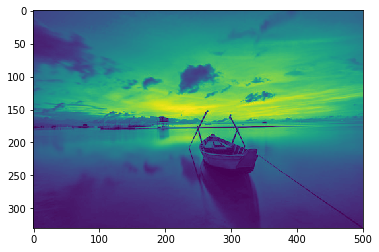

In [20]:
# 变成黑白
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

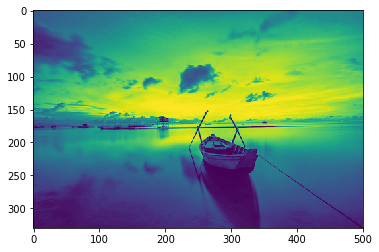

In [21]:
# 经过处理后
equalized_gray = cv.equalizeHist(gray)
plt.imshow(equalized_gray)

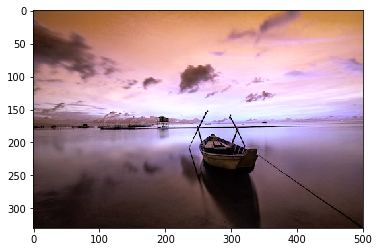

In [23]:
# “Y”表示明亮度（Luminance、Luma），“U”和“V”则是色度、饱和度（Chrominance、Chroma）
yuv = cv.cvtColor(original, cv.COLOR_BGR2YUV)
yuv[..., 0] = cv.equalizeHist(yuv[..., 0])
equalized_color = cv.cvtColor(yuv, cv.COLOR_YUV2BGR)
plt.imshow(equalized_color)

### 4. 角点检测

平直棱线的交汇点

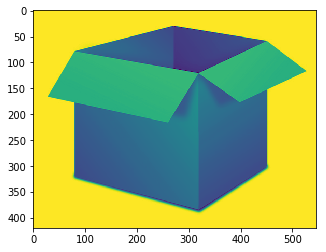

In [25]:
original = cv.imread('../data/box.png')
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

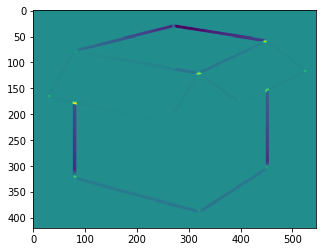

In [29]:
corners = cv.cornerHarris(gray, 7, 5, 0.04)
plt.imshow(corners)

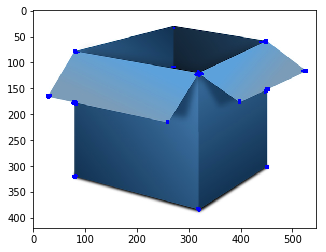

In [30]:
# 进行降噪，并标注
corners = cv.dilate(corners, None)
mixture = original.copy()
mixture[corners > corners.max() *0.01] = [0, 0, 255]
plt.imshow(mixture)

### 5. 特征点检测

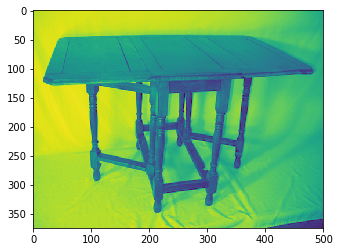

In [31]:
original = cv.imread('../data/table.jpg')
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

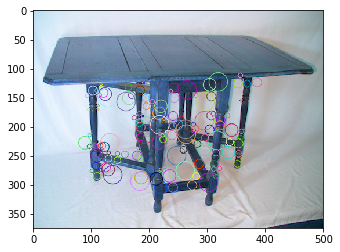

In [33]:
star = cv.xfeatures2d.StarDetector_create()
keypoints = star.detect(gray)
mixture = original.copy()
cv.drawKeypoints(original, keypoints, mixture, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(mixture)

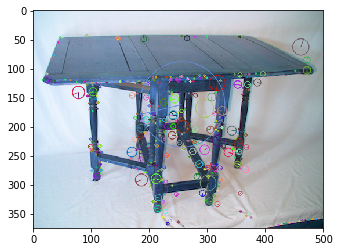

In [35]:
# sift 小指针为梯度变化的方向，亮度变化的大小方向， 边缘的竖线基本是垂直于边缘的
sift = cv.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray)
mixture = original.copy()
cv.drawKeypoints(original, keypoints, mixture, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(mixture)

### 6. 特征值(描述)矩阵

- 特征值(描述)矩阵
    - STAR特征点(位置，大小)+SIFT(方向)

(452, 128)


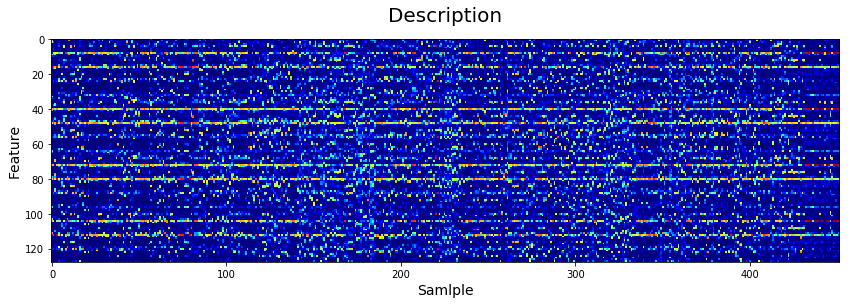

In [38]:
# 构建sift
_, desc = sift.compute(gray, keypoints)
print(desc.shape)
plt.matshow(desc.T, cmap='jet', fignum='Description')
plt.title('Description', fontsize=20)
plt.xlabel('Samlple', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tick_params(which='both', top=False, labeltop=False, labelbottom=True, labelsize=10)
plt.show()

### 7. 识别图片中的物体

关闭相关警告，编写搜索函数

In [39]:
import os
import warnings
import numpy as np
import cv2 as cv
import hmmlearn.hmm as hl


warnings.filterwarnings('ignore', category=DeprecationWarning)
np.seterr(all='ignore')


def search_objects(directory):
    directory = os.path.normpath(directory)
    if not os.path.isdir(directory):
        raise IOError("The directory '" + directory + "' doesn't exist!")
    objects = {}
    for curdir, subdirs, files in os.walk(directory):  # os.walk是对返回的迭代器进行迭代
        for jpeg in (file for file in files
                     if file.endswith('.jpg')):
            path = os.path.join(curdir, jpeg)
            label = path.split(os.path.sep)[-2]
            if label not in objects:
                objects[label] = []
            objects[label].append(path)
    return objects

In [40]:
train_objects = search_objects('../data/objects/training')
train_x, train_y = [], []
for label, filenames in train_objects.items():
    descs = np.array([])
    for filename in filenames:
        image = cv.imread(filename)
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        h, w = gray.shape[:2]
        f = 200 / min(h, w)
        gray = cv.resize(gray, None, fx=f, fy=f)
        star = cv.xfeatures2d.StarDetector_create()
        keypoints = star.detect(gray)
        sift = cv.xfeatures2d.SIFT_create()
        _, desc = sift.compute(gray, keypoints)
        if len(descs) == 0:
            descs = desc
        else:
            descs = np.append(descs, desc, axis=0)
    train_x.append(descs)
    train_y.append(label)

In [41]:
models = {}
for descs, label in zip(train_x, train_y):
    model = hl.GaussianHMM(n_components=4, covariance_type='diag', n_iter=1000)
    models[label] = model.fit(descs)

In [43]:
test_objects = search_objects('../data/objects/testing')
test_x, test_y, test_z = [], [], []
for label, filenames in test_objects.items():
    test_z.append([])
    descs = np.array([])
    for filename in filenames:
        image = cv.imread(filename)
        test_z[-1].append(image)
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        h, w = gray.shape[:2]
        f = 200 / min(h, w)
        gray = cv.resize(gray, None, fx=f, fy=f)
        star = cv.xfeatures2d.StarDetector_create()
        keypoints = star.detect(gray)
        sift = cv.xfeatures2d.SIFT_create()
        _, desc = sift.compute(gray, keypoints)
        if len(descs) == 0:
            descs = desc
        else:
            descs = np.append(descs, desc, axis=0)
    test_x.append(descs)
    test_y.append(label)
    
pred_test_y = []
for descs in test_x:
    best_score, best_label = None, None
    for label, model in models.items():
        score = model.score(descs)
        if (best_score is None) or (best_score < score):
            best_score, best_label = score, label
    pred_test_y.append(best_label)

In [44]:
i = 0
for label, pred_label, images in zip(
        test_y, pred_test_y, test_z):
    for image in images:
        i += 1
        cv.imshow('{} - {} {} {}'.format(i, label, '==' if label == pred_label else '!=', pred_label), image)
cv.waitKey()

113